<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/hreczany/dendrogram_hreczany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
data = pd.read_csv('/content/countries of the world (2).csv')
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

           Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                     

In [3]:
X = data.drop(['Country', 'Region'], axis=1)  # Usunięcie kolumn 'Country' i 'Region'
X = X.replace(',', '.', regex=True).astype(float)  # Zamiana przecinków na kropki i konwersja na float
X.fillna(X.mean(), inplace=True)  # Wypełnienie brakujących wartości średnią

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
data['Cluster'] = clusters

In [11]:
print(data['Cluster'].value_counts())

Cluster
1    66
6    51
3    43
0    37
2    24
4     4
5     2
Name: count, dtype: int64


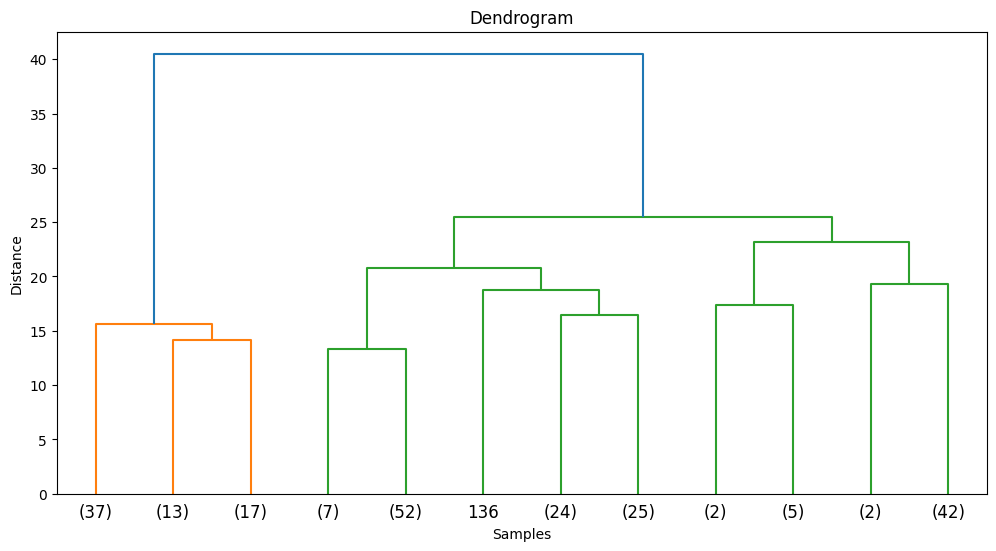

In [13]:
plt.figure(figsize=(12, 6))
dendrogram(linkage(X_scaled, method='ward'), truncate_mode='lastp', p=12)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()